In [1]:
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# Data set loading
digits = datasets.load_digits()


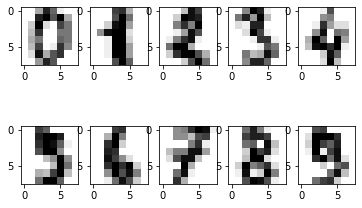

In [2]:
# Display the first ten number as an example of the data
for k,img in enumerate(range(10)):
    plt.subplot(2, 5, k+1)
    plt.imshow(digits.images[img],
               cmap='binary',
              interpolation='none')
plt.show()

In [3]:
# Data preparation
X=pd.DataFrame(digits.data)
y=pd.Series(digits.target, name='Actual')

# Information of data
X.dtypes
X.info()
X.describe()
X.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
0     1797 non-null float64
1     1797 non-null float64
2     1797 non-null float64
3     1797 non-null float64
4     1797 non-null float64
5     1797 non-null float64
6     1797 non-null float64
7     1797 non-null float64
8     1797 non-null float64
9     1797 non-null float64
10    1797 non-null float64
11    1797 non-null float64
12    1797 non-null float64
13    1797 non-null float64
14    1797 non-null float64
15    1797 non-null float64
16    1797 non-null float64
17    1797 non-null float64
18    1797 non-null float64
19    1797 non-null float64
20    1797 non-null float64
21    1797 non-null float64
22    1797 non-null float64
23    1797 non-null float64
24    1797 non-null float64
25    1797 non-null float64
26    1797 non-null float64
27    1797 non-null float64
28    1797 non-null float64
29    1797 non-null float64
30    1797 non-null float64
31    1797 non-null float

0      1
1      9
2     17
3     17
4     17
      ..
59    17
60    17
61    17
62    17
63    17
Length: 64, dtype: int64

In [4]:
# preperation of train, test data set
X_tr, X_t, y_tr, y_t = model_selection.train_test_split(X, y, test_size=0.30,
random_state=0)

In [5]:
# Model selection of analysis
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear', multi_class='auto')
# Model fitness
clf.fit(X_tr, y_tr)
# Forecasting depend on model
y_pred = clf.predict(X_t)

In [7]:
# Model Identification 
print("{} Result of Classification : \n{}\n".format(clf,metrics.classification_report(y_t, y_pred)))
print("Accuracy:\n{}".format(metrics.accuracy_score(y_t, y_pred)))
print("Confusion matrix:\n{}".format(metrics.confusion_matrix(y_t, y_pred)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) Result of Classification : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.89      0.90      0.90        52
           2       0.96      0.96      0.96        53
           3       0.93      0.96      0.95        54
           4       0.98      1.00      0.99        48
           5       0.98      0.96      0.97        57
           6       0.95      0.98      0.97        60
           7       1.00      0.94      0.97        53
           8       0.92      0.90      0.91        61
           9       0.95      0.93      0.94        57

    accuracy                           0.95   

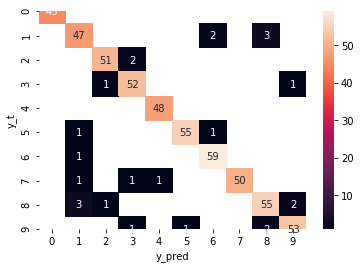

In [8]:
# visualization
import seaborn as sns
df = pd.DataFrame([y_t.reset_index()['Actual'],y_pred]).T
df.columns=['y_t', 'y_pred']
df_pivot=df.groupby(['y_t']).y_pred.value_counts().astype('int').unstack()
sns.heatmap(df_pivot, annot=True)